# Problem Set 1

## Problem 1: Publication Bias (2 points)

In a certain STEM field, researchers are constantly testing unlikely theories. Let's say 90% of all tested theories are, in fact, false. All studies use null hypothesis significance testing with a $p$-value threshold of $0.05$ to reject the null hypothesis that the claimed theory is false. For all theories that are true, $80\%$ reach $p \leq 0.05$, rejecting the null hypothesis. Once the investigations are finished, papers are submitted for publication. However, publishers **exhibit publication bias**, the preference to publish novel and interesting results. As a result, studies rejecting the null hypothesis have a $100\%$ chance of being published while only $10\%$ of studies failing to reject the null hypothesis make it past peer review. Among theories supported by published papers, what fraction is actually true? Please explain your answer using analytic calculations.

## Problem 2: Poisson Distribution (2 points)

The Poisson distribution is a common discrete probability distribution encountered in random processes that produce counts, i.e., non-negative integers. A Poisson distribution is characterized by a single parameter $\lambda$, such that the probability for each count $k$ is

$$P(k) = \frac{\lambda^k e^{-\lambda}}{k!} \, \, \, \mathrm{for} \, \, \, k \geq 0 \, .$$

One can show that $E(k) = \lambda$, i.e., the average value of $k$ is $\lambda$. Additionally, it can be demonstrated that if $X_1$ and $X_2$ are random variables drawn from Poisson distributions with means $\lambda_1$ and $\lambda_2$, their sum $X_1 + X_2$ follows a Poisson distribution with mean $\lambda_1 + \lambda_2$.

You study the ticks in the northeastern region of the United States. On average, a male deer will have $2.6$ ticks. You suspect that a certain type of deer is more susceptible to ticks and expect that you'll find more ticks on them.

(a) The first deer of this type you study has $k_\mathrm{obs} = 5$ ticks. What is the associated $p$-value, i.e., the probability of $k \geq k_\mathrm{obs}$ for a Poisson distribution?

(b) You continue your investigation, surveying $10$ deer altogether. How many ticks do you need to find among the $10$ deer to get $p < 0.01$?

Please support your answer with code using `scipy`'s `scipy.stats.poisson` class.

In [9]:
from scipy.stats import poisson
import math

mu_value = 2.6
k_observed = 5

p_value = poisson.pmf(k=k_observed, mu=mu_value)
print(f"The probability of seeing {k_observed} ticks or more is {p_value:0.4f}")

num_deer = 10
p_value = 0.01
least_expected_value = poisson.ppf(p_value, mu_value * num_deer)
most_expected_value = poisson.ppf(1 - p_value, mu_value * num_deer)
print(f"To get a p-value <= {p_value}, you would need to find less than {least_expected_value:.0f} ticks or more than {most_expected_value:.0f} on the ten deer.")


The probability of seeing 5 ticks or more is 0.0735
To get a p-value <= 0.01, you would need to find less than 15 ticks or more than 39 on the ten deer.


## Problem 3: Central Limit Theorem (2 points)

The central limit theorem states that, under appropriate conditions, the mean of random variables approaches a Gaussian (normal) distribution, even if individual random variables are drawn from non-Gaussian distributions. Specifically, the mean of $n$ draws of $X$ will approximately follow a normal distribution with mean $E(X)$ and variance $\mathrm{Var}(X) / n$. Here, we want to test that in practice by assuming that $X$ is drawn from a uniform distribution in the range $[-0.5, +0.5]$.

(a) Calculate analytically the expectation value of $X$, $E(X)$, and its variance, $\mathrm{Var}(X)$.

(b) Numerically, verify that the central limit theorem by simulating the sample mean distribution. For $n=1, 2, 5$, and $10$, generate many samples of $n$ independent draws from the uniform distribution and plot their histogram. On the same plot, overlay the expected Gaussian distribution with mean $E(X)$ and variance $\mathrm{Var}(X) / n$. Please make sure your plot has appropriate labels, legends, and titles.

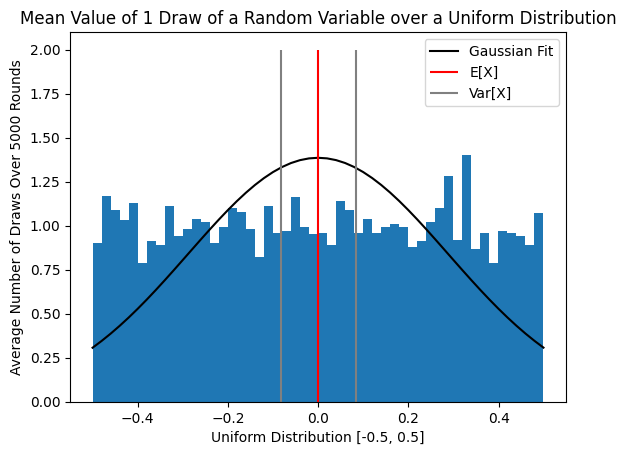

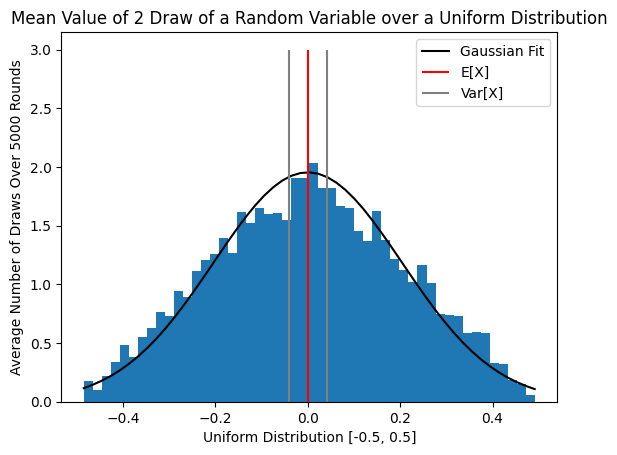

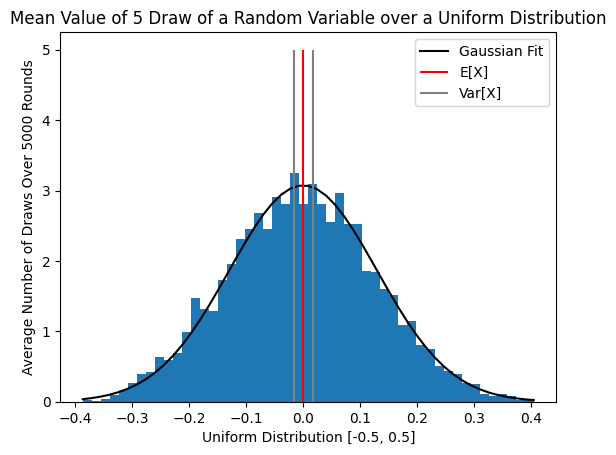

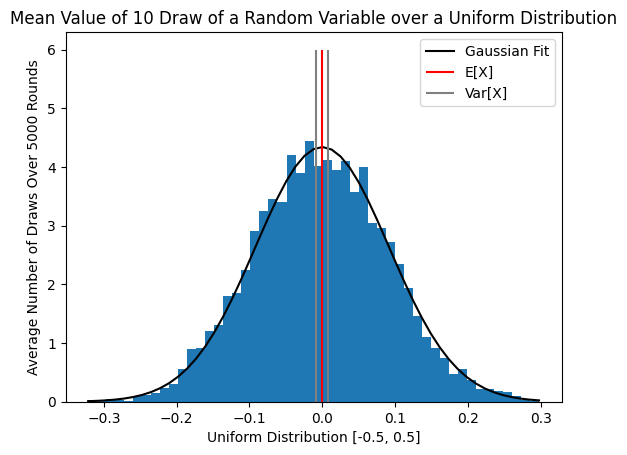

In [117]:
from collections import Counter
from numpy import random
import matplotlib.pyplot as plt
import statistics
from matplotlib import colors
import numpy as np
from scipy import stats

high = 0.5
low = -0.5

rounds = 5000
def draw_random(num):
    num_list = []
    for round in range(rounds):
        random_number = random.uniform(low, high, num)
        num_list.append(statistics.mean(random_number))
    return num_list

mean = 0
var = pow(high - low, 2) / 12
y_min = 0

def plot_hist(n, ymax):
    # generate data
    sample_list = draw_random(n)
    # fit to norm
    mu, sigma = stats.norm.fit(sample_list)
    # plot histogram and gaussian
    count, bins, ignored = plt.hist(sample_list, bins=50, density=True)
    plt.plot(bins, stats.norm.pdf(bins, mean, sigma), color = "black", label = "Gaussian Fit")

    # mean and variance lines
    plt.vlines(mean, y_min, ymax, color = "red", label = "E[X]")
    plt.vlines(var / n, y_min, ymax, color = "grey", label = "Var[X]")
    plt.vlines(-(var / n), y_min, ymax, color = "grey")

    plt.legend()
    if n == 1:
        plt.title(f"Mean Value of {n} Draw of a Random Variable over a Uniform Distribution")
    else:
        plt.title(f"Mean Value of {n} Draw of a Random Variable over a Uniform Distribution")
    plt.xlabel(f"Uniform Distribution [{low}, {high}]")
    plt.ylabel(f"Average Number of Draws Over {rounds} Rounds")
    plt.show()

plot_hist(1, 2)
plot_hist(2, 3)
plot_hist(5, 5)
plot_hist(10, 6)

